<a href="https://colab.research.google.com/github/ntsurayya/data-science-project_laptop-price-prediction/blob/main/data-science-project_laptop-price-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><span style='background :#F5EEF3' > Laptops Price Prediction 

# Background

Laptop semakin bervariasi dari sisi jenis, spesifikasi, brand, dan 
juga harga. Sebagai seorang Data Scientist dari suatu website pengulas gadget kita diminta untuk membuat model prediksi harga laptop, sehingga jika kita mengetahui jenis, spesifikasi, brand, dan fitur-fitur lainnya maka kita dapat menentukan harga laptop baru sebelum laptop tersebut dipasarkan.



# Import Library

In [ ]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None #default='warn'

import warnings
warnings.filterwarnings('ignore')

# Read File

In [ ]:
df = pd.read_csv('Dataset5_Laptop_Price.csv')

In [ ]:
df

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Windows 10,1.8kg,638.00
1299,1317,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Windows 10,1.5kg,229.00
1301,1319,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,Windows 10,2.19kg,764.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    1303 non-null   int64  
 1   Company      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Cpu          1303 non-null   object 
 5   Ram          1303 non-null   object 
 6   Memory       1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   object 
 9   Price_euros  1303 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 101.9+ KB


# Data Cleaning & Data Pre-processing

**Change column name to lower case**


In [ ]:
df = df.rename(columns=str.lower)

**Drop column 'laptop_id'**

In [ ]:
df = df.drop('laptop_id', axis=1)

**Check duplicate data**

In [ ]:
df[df.duplicated()].value_counts()

company  typename            inches  cpu                                   ram   memory              opsys       weight  price_euros
Asus     Notebook            15.6    Intel Celeron Dual Core N3050 1.6GHz  4GB   500GB HDD           Windows 10  2.2kg   369.00         3
Acer     Notebook            15.6    Intel Celeron Dual Core N3060 1.6GHz  4GB   500GB HDD           Linux       2.4kg   289.00         2
Asus     Notebook            15.6    Intel Core i7 6500U 2.5GHz            4GB   500GB HDD           Windows 10  2.2kg   720.32         2
         Ultrabook           13.3    Intel Core M 6Y30 0.9GHz              8GB   512GB SSD           Windows 10  1.2kg   729.00         2
Dell     Notebook            15.6    Intel Celeron Dual Core N3050 1.6GHz  2GB   500GB HDD           Windows 10  2.20kg  379.00         2
                                     Intel Core i3 7100U 2.4GHz            6GB   1TB HDD             Windows 10  2.3kg   459.00         2
                                     In

**Handling duplicate data**

In [ ]:
df = df.drop_duplicates()

**Check missing value**

In [ ]:
df.isnull().sum()

company        0
typename       0
inches         0
cpu            0
ram            0
memory         0
opsys          0
weight         0
price_euros    0
dtype: int64

### Dealing with RAM & Weight Columns

**Remove the strings in the 'ram' & 'weight' columns to get a numeric type**

In [ ]:
df['ram'] = df['ram'].str.replace('GB',' ')
df['ram'] = df['ram'].astype(int)

df['weight'] = df['weight'].str.replace('kg',' ')
df['weight'] = df['weight'].astype(float)

df.head()

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60


### Dealing with CPU Column

**Check distinct value in 'cpu' column**

In [ ]:
df['cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A9-Series 9410 2.9GHz        1
Name: cpu, Length: 118, dtype: int64

**Add column 'cpu_frq(GHz)' from 'cpu'**

In [ ]:
df['cpu_frq(GHz)'] = df['cpu'].str.extract(r'(\d+\s*GHz|\d+(?:\.\d+)\s*GHz)')
df['cpu_frq(GHz)'] = df['cpu_frq(GHz)'].str.replace('GHz',' ')
df['cpu_frq(GHz)'] = df['cpu_frq(GHz)'].astype(float)

df.head()

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz)
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1


**Check missing value in 'cpu_frq(GHz)'**

In [ ]:
#True means the column contain missing value
df[df['cpu_frq(GHz)'].isnull() == True]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz)


In [ ]:
#False means the column contain no missing value
df[df['cpu_frq(GHz)'].isnull() == False]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz)
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1
...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32,2.5
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00,2.5
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00,2.5
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00,1.6


**Check distinct value in 'cpu_frq(GHz)' column**

In [ ]:
df['cpu_frq(GHz)'].value_counts()

2.50    285
2.80    165
2.70    164
1.60    123
2.30     86
2.00     86
1.80     78
2.60     74
1.10     53
2.40     49
2.90     19
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
3.10      3
2.10      3
1.90      2
0.90      2
3.20      1
1.00      1
1.92      1
Name: cpu_frq(GHz), dtype: int64

**Add column 'cpu_brand' from 'cpu'**

In [ ]:
df['cpu_brand'] = df['cpu'].str.extract(r'^([\w\-]+)')

df.head()

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel


### Dealing with Memory Column

**Check distinct value in 'memory' column**

In [ ]:
df['memory'].value_counts()

256GB SSD                        411
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

**Convert 'memory' unit to GB**

In [ ]:
df['memory'] = df['memory'].str.replace('2TB', '2000GB')
df['memory'] = df['memory'].str.replace('1.0TB', '1TB', regex=True)
df['memory'] = df['memory'].str.replace('1TB', '1000GB')

df.head()

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel


**Add 4 new column for each memory based on type & capacity:**
* memory1_type
* memory2_type
* memory1_capacity
* memory2_capacity

**Add columns for memory type (split from 'memory')**

In [ ]:
df[['memory1_type', 'memory2_type']] = df['memory'].str.split('+',expand=True)

**Check missing value from memory1_type & memory2_type**
* True means the column contain missing value
* False means the column contain no missing value

In [ ]:
df[df['memory1_type'].isna() == True]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type


In [ ]:
df[df['memory2_type'].isna() == True]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel,128GB SSD,None
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel,128GB Flash Storage,None
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5,Intel,256GB SSD,None
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel,512GB SSD,None
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel,256GB SSD,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32,2.5,Intel,500GB HDD,None
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00,2.5,Intel,128GB SSD,None
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00,2.5,Intel,512GB SSD,None
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00,1.6,Intel,64GB Flash Storage,None


**Check distinct value in 'memory1_type' & 'memory2_type'**

In [ ]:
df['memory1_type'].value_counts()

256GB SSD              411
1000GB HDD             216
500GB HDD              123
512GB SSD              114
128GB SSD               96
256GB SSD               88
128GB SSD               74
32GB Flash Storage      36
512GB SSD               20
2000GB HDD              16
1000GB SSD              14
64GB Flash Storage      13
256GB Flash Storage      8
16GB Flash Storage       7
1000GB Hybrid            7
32GB SSD                 6
180GB SSD                5
128GB Flash Storage      4
16GB SSD                 3
1000GB SSD               2
512GB Flash Storage      2
64GB SSD                 1
64GB Flash Storage       1
1000GB HDD               1
32GB HDD                 1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
Name: memory1_type, dtype: int64

In [ ]:
df['memory2_type'].value_counts()

  1000GB HDD       185
  2000GB HDD        15
  256GB SSD          3
  500GB HDD          2
  1000GB Hybrid      2
  512GB SSD          1
Name: memory2_type, dtype: int64

**Add columns for memory capacity from 'memory'**

In [ ]:
df['memory1_capacity'] = df['memory'].str.extract(r"([\d. +-/]+)\s*GB")
df['memory1_type'] = df['memory1_type'].str.replace(r"([\d. +-/]+)\s*GB", '', regex=True)

df['memory2_capacity'] = df['memory2_type'].str.extract(r"([\d. +-/]+)\s*GB")
df['memory2_type'] = df['memory2_type'].str.replace(r"([\d. +-/]+)\s*GB", '', regex=True)

**Convert 'memory1_capacity' & 'memory2_capacity' to float**

In [ ]:
df['memory1_capacity'] = df['memory1_capacity'].astype(float)
df['memory2_capacity'] = df['memory2_capacity'].astype(float)

**Check missing value in 'memory2_type'**

In [ ]:
df[df['memory2_type'].isna() == True]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel,SSD,None,128.0,NaN
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel,Flash Storage,None,128.0,NaN
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5,Intel,SSD,None,256.0,NaN
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel,SSD,None,512.0,NaN
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel,SSD,None,256.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32,2.5,Intel,HDD,None,500.0,NaN
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00,2.5,Intel,SSD,None,128.0,NaN
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00,2.5,Intel,SSD,None,512.0,NaN
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00,1.6,Intel,Flash Storage,None,64.0,NaN


**Check distinct value in 'memory1_capacity' & 'memory2_capacity'**

In [ ]:
df['memory1_capacity'].value_counts()

256.0     507
1000.0    240
128.0     175
512.0     136
500.0     123
32.0       43
2000.0     16
64.0       15
16.0       10
180.0       5
240.0       1
8.0         1
508.0       1
Name: memory1_capacity, dtype: int64

In [ ]:
df['memory2_capacity'].value_counts()

1000.0    187
2000.0     15
256.0       3
500.0       2
512.0       1
Name: memory2_capacity, dtype: int64

**Replace NaN in 'memory2_capacity' to 0**

In [ ]:
df['memory2_capacity'] = df['memory2_capacity'].replace({'NaN': np.nan})
df['memory2_capacity'] = df['memory2_capacity'].fillna(0)

**Drop 'memory' column**

In [ ]:
df = df.drop(['memory'], axis=1)

### Dealing with Operating System Column

**Check distinct value in 'opsys'**

In [ ]:
df['opsys'].value_counts()

Windows 10      1046
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: opsys, dtype: int64

**Grouping type of 'opsys' for Windows & macOS**

In [ ]:
df['opsys'] = df['opsys'].replace({
    'Windows 10' : 'Windows',
    'Windows 10 S' : 'Windows',
    'Windows 7' : 'Windows',
    'Mac OS X' : 'macOS'
})

**Check distinct value in 'opsys' (updated)**

In [ ]:
df['opsys'].value_counts()

Windows      1099
No OS          66
Linux          58
Chrome OS      27
macOS          21
Android         2
Name: opsys, dtype: int64

# Exploratory Data Analysis

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Manufacturing & Type

**Number & Price of Laptops by Company**

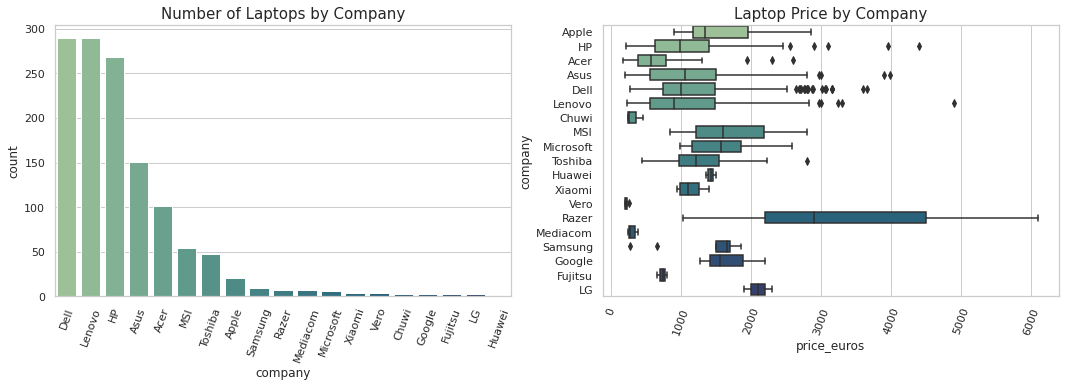

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='company', ax=axes[0], data=df, order=df['company'].value_counts().index, palette='crest')
sns.boxplot(x='price_euros', y='company', data=df, palette='crest')

axes[0].set_title('Number of Laptops by Company', fontsize=15)
axes[1].set_title('Laptop Price by Company', fontsize=15)

plt.show()

**Number & Price of Laptops by Type**

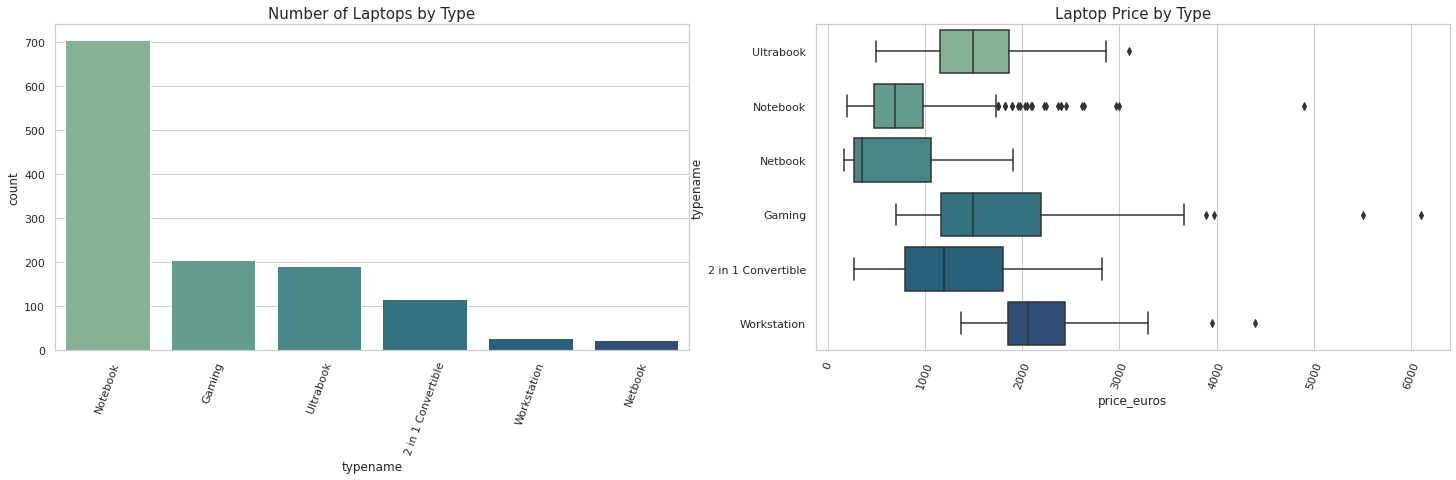

In [ ]:
sns.set(rc={'figure.figsize':(25,6)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='typename', ax=axes[0], data=df, order=df['typename'].value_counts().index, palette='crest')
sns.boxplot(x='price_euros', y='typename', data=df, palette='crest')

axes[0].set_title('Number of Laptops by Type', fontsize=15)
axes[1].set_title('Laptop Price by Type', fontsize=15)

plt.show()

**Price Distribution & Average Price by Company**

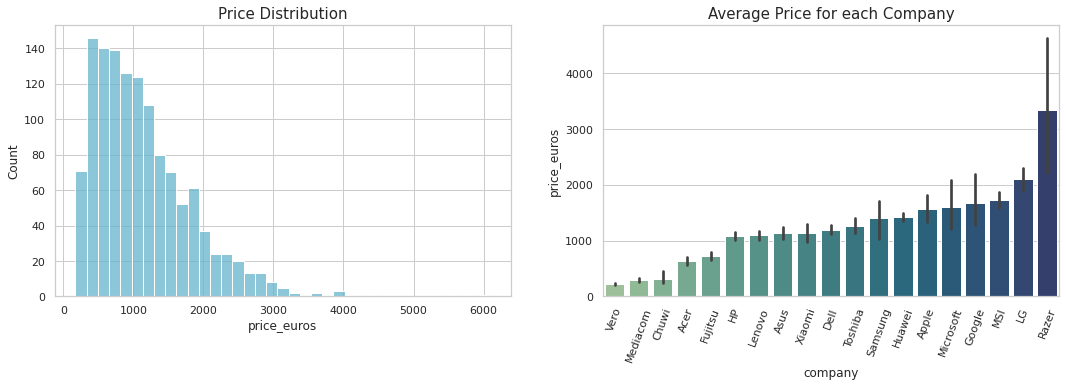

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.histplot(x='price_euros', ax=axes[0], data=df, color='c')
orders = df.groupby('company').price_euros.agg('mean').sort_values().index
sns.barplot(x='company', y='price_euros', estimator=np.mean, ax=axes[1], data=df, palette='crest', order=orders)

plt.xticks(rotation=70)
axes[0].set_title('Price Distribution', fontsize=15)
axes[1].set_title('Average Price for each Company', fontsize=15)

plt.show()

**INSIGHT:** 
* Top 7 brand laptop populer (>50 jenis): Dell, Lenovo, HP, Asus, Acer, MSI, & Toshiba 
* Hanya terdapat 10 jenis laptop pada tiap brand Samsung, Razer, Mediacom, Microsoft, Xiaomi, Vero, Chuwi, Google, Fujitsu, LG, & Huawei
* Harga laptop antara 200 hingga 6000, akan tetapi mayoritas harga laptop di bawah 4000
* Laptop termahal (>4000): Razer (hanya terdapat 7 jenis) & beberapa brand laptop lainnya
* Di antara brand laptop populer, MSI memiliki harga rata-rata termahal
* Dell, Lenovo, HP, Asus memiliki harga laptop rata-rata 1000 euro
* Laptop termurah: Vero & Acer (paling murah di antara brand populer)
* Top 3 tipe laptop populer: Notebook, Gaming, & Ultrabook. Namun, Notebook sangat mendominasi sedangkan Netbook tipe laptop paling tidak populer
* Notebook & netbook memiliki harga rata-rata terendah

**Check laptop price that exceed 4000euro**

In [ ]:
df[df['price_euros'] > 4000]

,company,typename,inches,cpu,ram,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity
196,Razer,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Windows,3.49,6099.0,2.9,Intel,SSD,None,1000.0,0.0
610,Lenovo,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,32,Windows,2.50,4899.0,3.1,Intel,SSD,None,1000.0,0.0
749,HP,Workstation,17.3,Intel Xeon E3-1535M v5 2.9GHz,16,Windows,3.00,4389.0,2.9,Intel,SSD,None,256.0,0.0
830,Razer,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Windows,3.49,5499.0,2.9,Intel,SSD,None,512.0,0.0


* Hanya ada 4 laptop dengan harga di atas 4000 euro: 2 Razer, 1 HP, & 1 Lenovo
* Eliminasi laptop dengan harga melebihi 4000 euro

**Eliminate data with laptop price more than 4000 euro**

In [ ]:
df = df[df['price_euros'] < 4000]

### CPU & Operating System

**Number & Price of Laptops by CPU Brand**

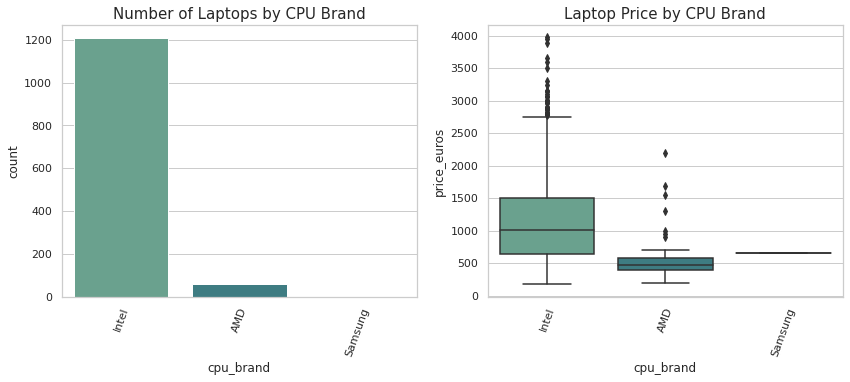

In [ ]:
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='cpu_brand', ax=axes[0], data=df, order=df['cpu_brand'].value_counts().index, palette='crest')
sns.boxplot(x='cpu_brand', y='price_euros', data=df, palette='crest')

axes[0].set_title('Number of Laptops by CPU Brand', fontsize=15)
axes[1].set_title('Laptop Price by CPU Brand', fontsize=15)

plt.show()

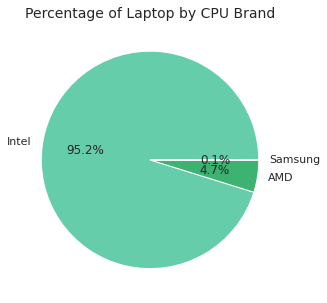

In [ ]:
cpub = df['cpu_brand'].value_counts()
plt.pie(cpub, labels=cpub.index, autopct='%0.1f%%', colors = ['mediumaquamarine','mediumseagreen','mediumturquoise'])
plt.title('Percentage of Laptop by CPU Brand', fontsize=14)
plt.show()

**Number & Price of Laptops by Operating System**

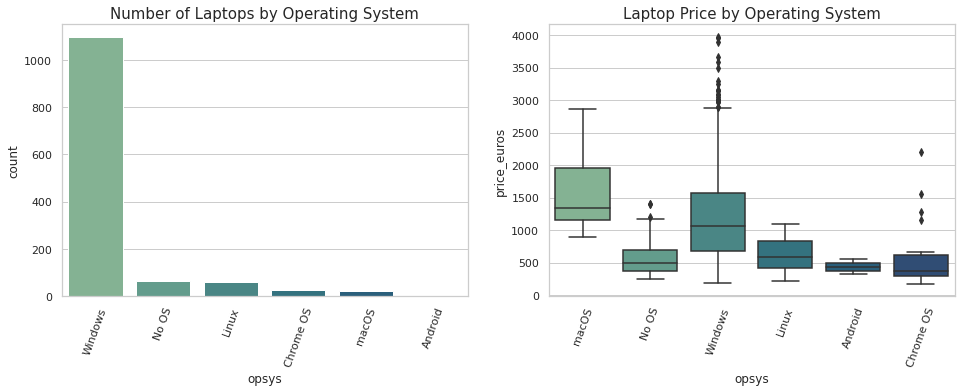

In [ ]:
sns.set(rc={'figure.figsize':(16,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='opsys', ax=axes[0], data=df, order=df['opsys'].value_counts().index, palette='crest')
sns.boxplot(x='opsys', y='price_euros', data=df, palette='crest')

axes[0].set_title('Number of Laptops by Operating System', fontsize=15)
axes[1].set_title('Laptop Price by Operating System', fontsize=15)

plt.show()

**INSIGHT:** 
* Top CPU terpopuler & termahal: Intel (Sangat mendominasi (95.2%) dibandingkan 2 jenis lainnya)
* Intel (Core i5 7200U, Core i7 7700HQ, Core i7 7500U): Jenis CPU terpopuler
* Sistem operasi yang tersedia: Windows, Mac, Chrome, Linux, & Android, serta laptop yang dijual kosongan tanpa sistem operasi (No OS)
* Rata-rata harga laptop termahal: Laptop macOS
* Rata-rata harga laptop termurah: Laptop Linux
Laptop macOS memiliki harga rata-rata termahal dan laptop Linux termurah

### Weight & Screen Size

**Distribution of Weight & Screen Size**

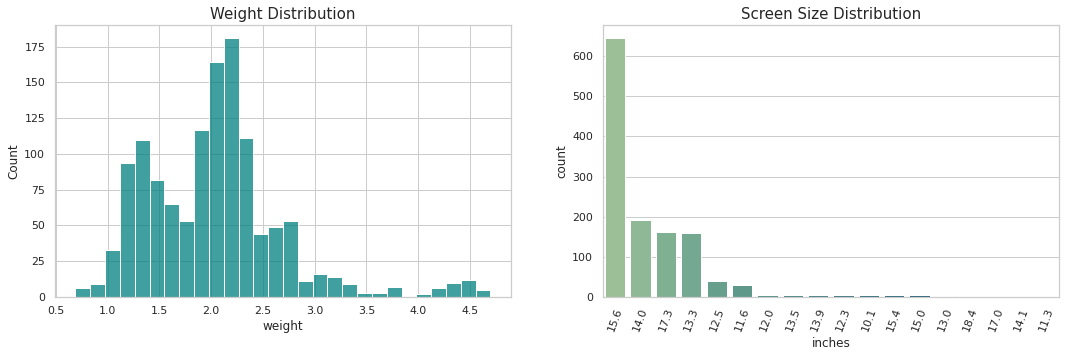

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.histplot(x='weight', ax=axes[0], color='teal', data=df)
sns.countplot(x='inches', ax=axes[1], order=df['inches'].value_counts().index, data=df, palette='crest')

plt.xticks(rotation=70)

axes[0].set_title('Weight Distribution', fontsize=15)
axes[1].set_title('Screen Size Distribution', fontsize=15)

plt.show()

**INSIGHT:** 
* Lebih dari setengah laptop pada dataset memiliki layar ukuran 15.6 inches.
* Top 5 ukuran layar laptop terbanyak: 15.6, 14.0, 17.3, 13.3, & 12.5
* Top 5 ukuran berat laptop terbanyak: 2.20, 2.20, 2.00, 2.40, & 2.50
* Hampir semua laptop memiliki ukuran berat antara 1.3 & 2.5

### RAM & Hard Drive

**Number & Price of Laptops by RAM**

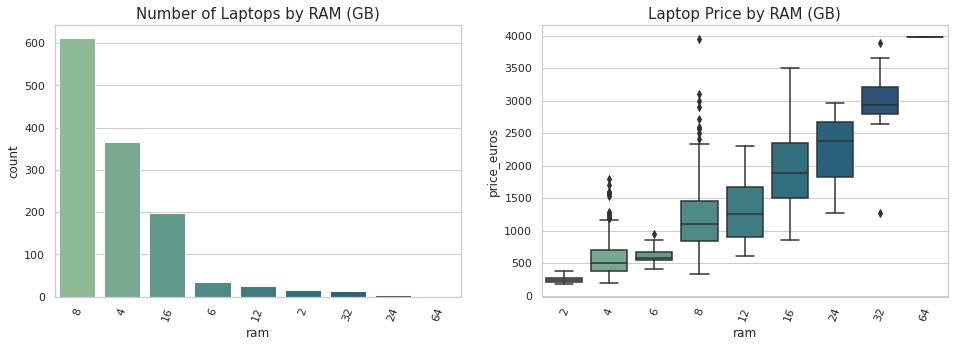

In [ ]:
sns.set(rc={'figure.figsize':(16,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='ram', ax=axes[0], data=df, order=df['ram'].value_counts().index, palette='crest')
sns.boxplot(x='ram', y='price_euros', data=df, palette='crest')

axes[0].set_title('Number of Laptops by RAM (GB)', fontsize=15)
axes[1].set_title('Laptop Price by RAM (GB)', fontsize=15)

plt.show()

* RAM tersedia dari 8 GB hingga 64 GB
* Top RAM terbanyak: 8 GB, sedangkan 64 GB sebaliknya
* Tampak adanya hubungan yang mencolok antara RAM dan harga laptop, semakin besar RAM semakin mahal
* Laptop dengan RAM 24 GB hanya 3 laptop dan 1 laptop untuk 64 GB sehingga dieliminasi dari dataset

**Number of Laptops by Hard Drive Type**

Drop 'ram' with 24 & 64 GB

In [ ]:
df = df[df['ram'].isin([24,64]) == False]

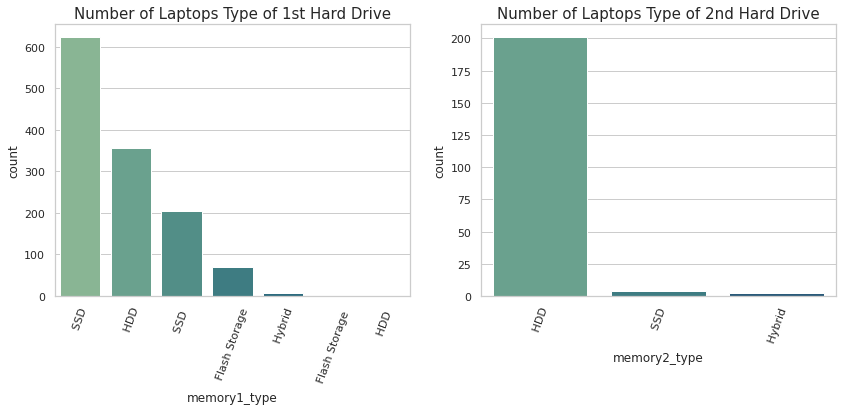

In [ ]:
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='memory1_type', ax=axes[0], data=df, order=df['memory1_type'].value_counts().index, palette='crest')
sns.countplot(x='memory2_type', ax=axes[1], data=df, order=df['memory2_type'].value_counts().index, palette='crest')

axes[0].set_title('Number of Laptops Type of 1st Hard Drive', fontsize=15)
axes[1].set_title('Number of Laptops Type of 2nd Hard Drive', fontsize=15)

plt.show()

* Memory type 1 didominasi oleh SSD
* Memory type 2 didominasi oleh HHD (terdapat selisih yang sangat jauh dengan 2 tipe lainnya)

**Number of Laptops by Hard Drive Capacity Type**

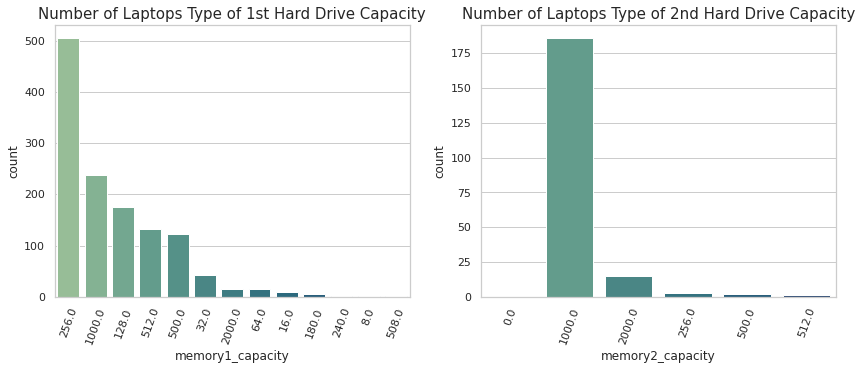

In [ ]:
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='memory1_capacity', ax=axes[0], data=df, order=df['memory1_capacity'].value_counts().index, palette='crest')
sns.countplot(x='memory2_capacity', ax=axes[1], order=df['memory2_capacity'].value_counts().index, data=df[df['memory2_capacity']!=0], palette='crest')


axes[0].set_title('Number of Laptops Type of 1st Hard Drive Capacity', fontsize=15)
axes[1].set_title('Number of Laptops Type of 2nd Hard Drive Capacity', fontsize=15)

plt.show()

**Price of Laptops by Hard Drive Capacity Type**

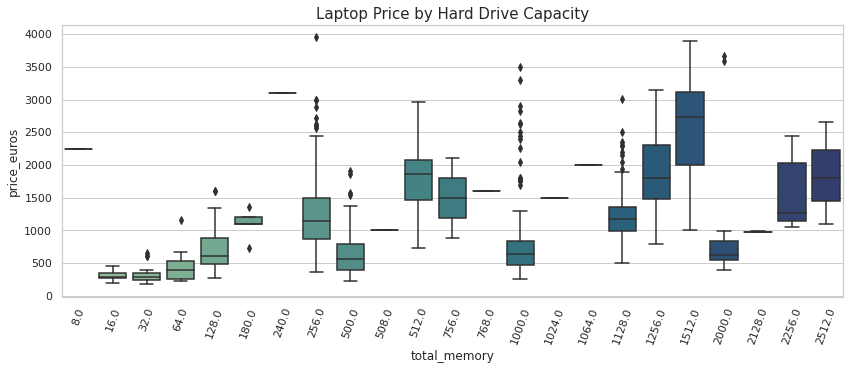

In [ ]:
df['total_memory'] = df['memory1_capacity'] + df['memory2_capacity']
sns.boxplot(x='total_memory', y='price_euros', data=df, palette='crest')
plt.xticks(rotation=70)
plt.title('Laptop Price by Hard Drive Capacity', fontsize=15)
plt.show()

* Terdapat 180 laptop dengan 2 memory.
* Jenis memory 1 paling umum: SSD (256 GB)
* Jenis memory 2 paling umum: HDD (1000 GB)
* Memory 2 memiliki kapasitas lebih besar dari memory 1
* Kapasitas memory memiliki kecenderungan terhadap harga, namun tidak terlal signifikan

# Model Development

**Import library**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

**Backup dataset (df_model)**

In [ ]:
df_model = df

In [ ]:
df_model.columns

Index(['company', 'typename', 'inches', 'cpu', 'ram', 'opsys', 'weight',
       'price_euros', 'cpu_frq(GHz)', 'cpu_brand', 'memory1_type',
       'memory2_type', 'memory1_capacity', 'memory2_capacity', 'total_memory'],
      dtype='object')

### Data Preparation

**One hot encode for categorical columns**

In [ ]:
col_to_encode = ['company', 'typename', 'opsys', 'cpu', 'memory1_type', 'memory2_type', 'cpu_brand']

In [ ]:
df_model = pd.get_dummies(df_model, columns = col_to_encode)

In [ ]:
print(df_model.shape)
df_model

(1265, 168)


,inches,ram,weight,price_euros,cpu_frq(GHz),memory1_capacity,memory2_capacity,total_memory,company_Acer,company_Apple,...,memory1_type_ HDD,memory1_type_ Hybrid,memory1_type_ SSD,memory1_type_ SSD,memory2_type_ HDD,memory2_type_ Hybrid,memory2_type_ SSD,cpu_brand_AMD,cpu_brand_Intel,cpu_brand_Samsung
0,13.3,8,1.37,1339.69,2.3,128.0,0.0,128.0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,13.3,8,1.34,898.94,1.8,128.0,0.0,128.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,15.6,8,1.86,575.00,2.5,256.0,0.0,256.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,15.4,16,1.83,2537.45,2.7,512.0,0.0,512.0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,13.3,8,1.37,1803.60,3.1,256.0,0.0,256.0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,15.6,4,2.20,720.32,2.5,500.0,0.0,500.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1270,14.0,4,1.80,638.00,2.5,128.0,0.0,128.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1271,13.3,16,1.30,1499.00,2.5,512.0,0.0,512.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1272,14.0,2,1.50,229.00,1.6,64.0,0.0,64.0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Check missing value in df_model**

In [ ]:
pd.DataFrame(df_model.isnull().sum())

,0
inches,0
ram,0
weight,0
price_euros,0
cpu_frq(GHz),0
...,...
memory2_type_ Hybrid,0
memory2_type_ SSD,0
cpu_brand_AMD,0
cpu_brand_Intel,0


**Train & Test Splitting**

In [ ]:
X = df_model
Y = X['price_euros'].values
X = X.drop('price_euros', axis=1).values

In [ ]:
X

array([[13.3 ,  8.  ,  1.37, ...,  0.  ,  1.  ,  0.  ],
       [13.3 ,  8.  ,  1.34, ...,  0.  ,  1.  ,  0.  ],
       [15.6 ,  8.  ,  1.86, ...,  0.  ,  1.  ,  0.  ],
       ...,
       [13.3 , 16.  ,  1.3 , ...,  0.  ,  1.  ,  0.  ],
       [14.  ,  2.  ,  1.5 , ...,  0.  ,  1.  ,  0.  ],
       [15.6 ,  6.  ,  2.19, ...,  0.  ,  1.  ,  0.  ]])

In [ ]:
Y

array([1339.69,  898.94,  575.  , ..., 1499.  ,  229.  ,  764.  ])

* Data training : 80%
* Data testing  : 20%

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=9)

In [ ]:
X_train

array([[14.  ,  8.  ,  1.64, ...,  0.  ,  1.  ,  0.  ],
       [15.6 , 12.  ,  2.15, ...,  0.  ,  1.  ,  0.  ],
       [13.3 ,  4.  ,  1.2 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [15.6 ,  8.  ,  2.5 , ...,  0.  ,  1.  ,  0.  ],
       [15.6 ,  8.  ,  1.9 , ...,  0.  ,  1.  ,  0.  ],
       [14.  ,  8.  ,  1.5 , ...,  0.  ,  1.  ,  0.  ]])

In [ ]:
Y_train

array([1089.,  659.,  369., ..., 1169.,  663., 1099.])

### Hyperparameter Search & Cross Validation

* Create pipeline for several regression algorithms to get **the best default results**
* Method for getting the best sample: **K-fold cross validation** (k=10)


In [ ]:
pipelines = []
pipelines.append(('LinearRegression', Pipeline([('LR',LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('LASSO', Lasso())])))
pipelines.append(('Ridge', Pipeline([('Ridge', Ridge())])))
pipelines.append(('ElasticNet', Pipeline([('EN', ElasticNet())])))
pipelines.append(('DecisionTreeRegressor', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('RandomForestRegressor', Pipeline([('RF', RandomForestRegressor())])))
pipelines.append(('GradientBoostingRegressor', Pipeline([('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=9, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LinearRegression: -3751985665.246282 (2270541287.444616)
Lasso: -246.066761 (33.310205)
Ridge: -241.988216 (29.403868)
ElasticNet: -290.174210 (36.170677)
DecisionTreeRegressor: -241.861953 (38.614284)
RandomForestRegressor: -191.276002 (36.631556)
GradientBoostingRegressor: -208.150376 (31.979508)


* **Random Forest** memiliki performa terbaik dengan nilai MAE terkecil
* Pengujian kembali beberapa algoritma ini menggunakan hyperparameter search dengan shufflesplit & K-fold split

**Hyperparameter Search**

In [ ]:
def find_best_model_using_gridsearchcv(X,y, cv):
    algos = {
        'linear_regression' : {'model': LinearRegression(), 'params': {'normalize': [True, False] } },
        'lasso': {'model': Lasso(), 'params': { 'alpha': [0.1, 1, 10, 100]}},
        'ridge': {'model': Ridge(), 'params': { 'alpha': [0.1, 1, 10, 100]}},
        'elastic_net': {'model': ElasticNet(), 'params': { 'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}},
        'decision_tree':{'model': DecisionTreeRegressor(),'params': {'criterion' : ['mse','mae'], 'splitter': ['best','random']}},
        'Random_forest': {'model':RandomForestRegressor(), 'params' :{
                        'random_state' : [9], 'n_estimators' : [50, 100, 125],'max_depth':[10, 30, 50],'max_features':[10,15,20]}},
        'Gradient_boosted_tree': {'model':GradientBoostingRegressor(), 'params' :{'loss' : ['squared_error','absolute_error'], 
                                                                                  'n_estimators' : [50, 100, 125],'learning_rate':[0.1, 0.5, 0.9],
                                                                                  'criterion' : ['mse','mae']}}}
    scores = []
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=kfold, scoring='neg_mean_absolute_error')
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

**Shuffle Split n=5**

In [ ]:
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
shuffle_result = find_best_model_using_gridsearchcv(X_train, Y_train, shuffle_split)
shuffle_result

,model,best_score,best_params
0,linear_regression,-3.751986e+09,{'normalize': False}
1,lasso,-2.445586e+02,{'alpha': 0.1}
2,ridge,-2.419882e+02,{'alpha': 1}
3,elastic_net,-2.452092e+02,"{'alpha': 0.1, 'l1_ratio': 0.9}"
4,decision_tree,-2.374063e+02,"{'criterion': 'mae', 'splitter': 'random'}"
5,Random_forest,-1.896782e+02,"{'max_depth': 50, 'max_features': 15, 'n_estim..."
6,Gradient_boosted_tree,-1.947345e+02,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo..."


**Kfold n=10**

In [ ]:
kfold = KFold(n_splits=10, random_state=9, shuffle = True)
kfold_result = find_best_model_using_gridsearchcv(X_train, Y_train, kfold)
kfold_result

,model,best_score,best_params
0,linear_regression,-3.751986e+09,{'normalize': False}
1,lasso,-2.445586e+02,{'alpha': 0.1}
2,ridge,-2.419882e+02,{'alpha': 1}
3,elastic_net,-2.452092e+02,"{'alpha': 0.1, 'l1_ratio': 0.9}"
4,decision_tree,-2.399734e+02,"{'criterion': 'mae', 'splitter': 'best'}"
5,Random_forest,-1.896782e+02,"{'max_depth': 50, 'max_features': 15, 'n_estim..."
6,Gradient_boosted_tree,-1.955477e+02,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo..."


* Hasil hyperparameter search kedua metode split menghasilkan **Random Forest** sebagai regressor dengan **nilai MAE terkecil**
* Model yang digunakan yaitu Random Forest dengan hasil hyperparameter search terbaik

### Model Building

In [ ]:
hyper_param = shuffle_result.loc[shuffle_result['best_score'] == shuffle_result['best_score'].max(), 'best_params'].to_list()

hyper_params = hyper_param[0]

for key,val in hyper_params.items():
        exec(key + '=val')
        print(key, ' ', val)

max_depth   50
max_features   15
n_estimators   125
random_state   9


In [ ]:
model = RandomForestRegressor(random_state=random_state, 
                              max_depth = max_depth, 
                              max_features = max_features, 
                              n_estimators = n_estimators)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=50, max_features=15, n_estimators=125,
                      random_state=9)

### Model Testing

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
predictions = model.predict(X_test)
print (mean_absolute_error(Y_test, predictions))

180.32354869878907


Hasil model memberikan **nilai MAE yang cukup baik** sehingga dilanjutkan ke pembentukan dataframe akhir

In [ ]:
col_pred = df_model.columns.tolist()
col_pred.remove('price_euros')
col_pred

['inches',
 'ram',
 'weight',
 'cpu_frq(GHz)',
 'memory1_capacity',
 'memory2_capacity',
 'total_memory',
 'company_Acer',
 'company_Apple',
 'company_Asus',
 'company_Chuwi',
 'company_Dell',
 'company_Fujitsu',
 'company_Google',
 'company_HP',
 'company_Huawei',
 'company_LG',
 'company_Lenovo',
 'company_MSI',
 'company_Mediacom',
 'company_Microsoft',
 'company_Razer',
 'company_Samsung',
 'company_Toshiba',
 'company_Vero',
 'company_Xiaomi',
 'typename_2 in 1 Convertible',
 'typename_Gaming',
 'typename_Netbook',
 'typename_Notebook',
 'typename_Ultrabook',
 'typename_Workstation',
 'opsys_Android',
 'opsys_Chrome OS',
 'opsys_Linux',
 'opsys_No OS',
 'opsys_Windows',
 'opsys_macOS',
 'cpu_AMD A10-Series 9600P 2.4GHz',
 'cpu_AMD A10-Series 9620P 2.5GHz',
 'cpu_AMD A10-Series A10-9620P 2.5GHz',
 'cpu_AMD A12-Series 9700P 2.5GHz',
 'cpu_AMD A12-Series 9720P 2.7GHz',
 'cpu_AMD A12-Series 9720P 3.6GHz',
 'cpu_AMD A4-Series 7210 2.2GHz',
 'cpu_AMD A6-Series 7310 2GHz',
 'cpu_AMD A6-S

**Concate X test, Y test, & prediction results**

In [ ]:
data_tuples = list(zip(Y_test, predictions))
data_tuples

predicts  = pd.DataFrame(data_tuples, columns = ['actual_price_euros', 'preds_price_euros'])

df_out = pd.DataFrame(X_test, columns = col_pred)
df_out = pd.merge(df_out, predicts,how = 'left',left_index = True, right_index = True)

**Reverse one hot encode**

In [ ]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
df_out = undummify(df_out.set_index(['inches',
 'ram',
 'weight',
 'cpu_frq(GHz)',
 'memory1_capacity',
 'memory2_capacity',
 'total_memory', 'actual_price_euros', 'preds_price_euros'])).reset_index()

print(df_out.shape)
print(df.shape)

df_out.head()

(253, 15)
(1265, 15)


,inches,ram,weight,cpu_frq(GHz),memory1_capacity,memory2_capacity,total_memory,actual_price_euros,preds_price_euros,company,typename,opsys,cpu,memory1,memory2
0,17.3,4.0,2.36,2.0,1000.0,0.0,1000.0,659.0,583.522773,Dell,Notebook,Windows,Intel Core i3 6006U 2.0GHz,type_ HDD,type_ HDD
1,13.3,8.0,1.23,1.6,256.0,0.0,256.0,1399.0,1747.231680,Dell,Ultrabook,Windows,Intel Core i5 8250U 1.6GHz,type_ SSD,type_ HDD
2,15.6,8.0,1.84,2.7,256.0,0.0,256.0,1304.0,1200.315205,HP,Notebook,Windows,Intel Core i7 7500U 2.7GHz,type_ SSD,type_ HDD
3,15.6,16.0,2.20,2.8,256.0,1000.0,1256.0,2449.0,1706.421410,Asus,Gaming,Windows,Intel Core i7 7700HQ 2.8GHz,type_ SSD,type_ HDD
4,15.6,6.0,2.19,2.5,1000.0,0.0,1000.0,764.0,664.845440,HP,Notebook,Windows,Intel Core i7 6500U 2.5GHz,type_ HDD,type_ HDD


In [ ]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inches              253 non-null    float64
 1   ram                 253 non-null    float64
 2   weight              253 non-null    float64
 3   cpu_frq(GHz)        253 non-null    float64
 4   memory1_capacity    253 non-null    float64
 5   memory2_capacity    253 non-null    float64
 6   total_memory        253 non-null    float64
 7   actual_price_euros  253 non-null    float64
 8   preds_price_euros   253 non-null    float64
 9   company             253 non-null    object 
 10  typename            253 non-null    object 
 11  opsys               253 non-null    object 
 12  cpu                 253 non-null    object 
 13  memory1             253 non-null    object 
 14  memory2             253 non-null    object 
dtypes: float64(9), object(6)
memory usage: 29.8+ KB


# Model Explainibility

### Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

**Analisis fitur** yang penting oleh model dalam melakukan prediksi
* Kita gunakan pendekatan Mean Decrease in Impurity & Mean Decrease Accuracy untuk melihat fitur apa saja yang paling berpengaruh
1. **MDI**: Metode pengukuran seberapa penting suatu fitur menggunakan pendekatan pemisahan keputusan dari suatu fitur pada tree based algorithm, semakin besar nilai MDI maka tersebut semakin penting dalam menentukan model
2. **MDA**: Metode pengukuran seberapa penting suatu fitur menggunakan pendekatan permutasi dari beberapa sampel sebelum melakukan pemisahan keputusan dari suatu fitur pada tree based algorithm, semakin besar nilai MDI maka tersebut semakin penting dalam menentukan model.

Umumnya **MDA lebih sering digunakan** karena nilai plus dari pendekatan permutasi beberapa sampel yang berbeda dari data training.

**Mean Decrease in Impurity**

In [ ]:
importances = model.feature_importances_

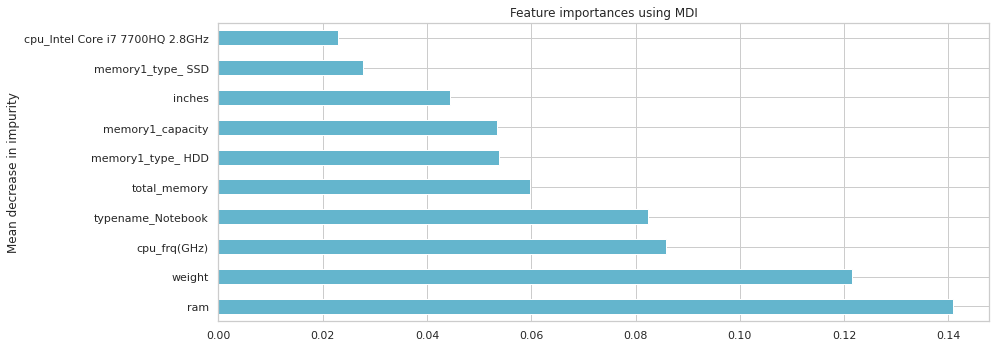

In [ ]:
forest_importances = pd.Series(importances, index=col_pred)

forest_importances.sort_values(ascending=False, inplace=True)

sns.set_style('whitegrid') 
fig, ax = plt.subplots()
forest_importances.head(10).plot.barh(ax=ax, color='c')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Mean Decrease Accuracy**

In [ ]:
result_permutation = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=9, n_jobs=2
)

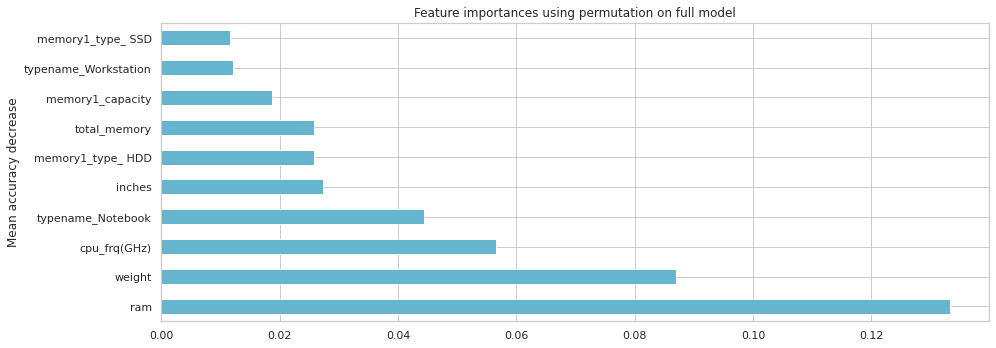

In [ ]:
forest_importances_permutation = pd.Series(result_permutation.importances_mean, index=col_pred)

forest_importances_permutation.sort_values(ascending=False, inplace=True)

sns.set_style('whitegrid') 
fig, ax = plt.subplots()
forest_importances_permutation.head(10).plot.barh(ax=ax, color='c')
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

* Dari hasil MDI dan MDA diperoleh fitur terpenting yaitu **RAM** dalam memprediksi model
* Fitur yang konsisten muncul di 4 fitur teratas hasil MDI dan MDA: **RAM, weight, CPU_frq(GHz), dan Jenis Notebook**

# Save Result and Model to Drive

In [ ]:
from google.colab import drive
drive.mount('drive')
import pickle

# save the model to disk
pickle.dump(model, open('model_rf_laptop_prediction.pkl', 'wb'))

!cp model_rf_laptop_prediction.pkl 'drive/My Drive/Colab Notebooks'

df_out.to_csv('laptop_price_prediction_result.csv', sep=';', encoding='utf-8')

!cp laptop_price_prediction_result.csv 'drive/My Drive'

Mounted at drive


# Remarks

Diperoleh suatu model untuk memprediksi harga laptop dengan metode model selection dan hyperparameter search yang menghasilkan nilai MAE terkecil dengan **180 euro**.

# EDA of Prediction Result

In [ ]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inches              253 non-null    float64
 1   ram                 253 non-null    float64
 2   weight              253 non-null    float64
 3   cpu_frq(GHz)        253 non-null    float64
 4   memory1_capacity    253 non-null    float64
 5   memory2_capacity    253 non-null    float64
 6   total_memory        253 non-null    float64
 7   actual_price_euros  253 non-null    float64
 8   preds_price_euros   253 non-null    float64
 9   company             253 non-null    object 
 10  typename            253 non-null    object 
 11  opsys               253 non-null    object 
 12  cpu                 253 non-null    object 
 13  memory1             253 non-null    object 
 14  memory2             253 non-null    object 
dtypes: float64(9), object(6)
memory usage: 29.8+ KB


**Actual & Prediction Price Distribution**

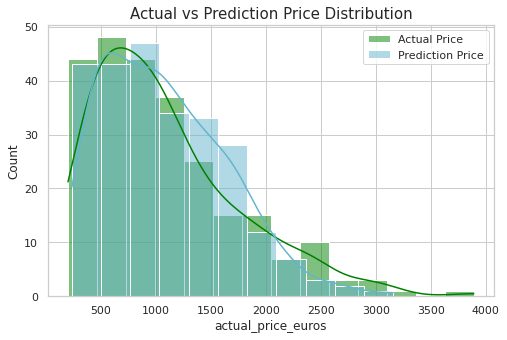

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')

sns.histplot(x='actual_price_euros', data=df_out, color='green', kde=True, label='Actual Price')
sns.histplot(x='preds_price_euros', data=df_out, color='c', kde=True, label='Prediction Price')

plt.title('Actual vs Prediction Price Distribution', fontsize=15)
plt.legend()
plt.show()

Distribusi antara harga sebenarnya & prediksi menunjukkan kecenderungan yang sama yaitu skewness positif. Harga laptop sebesar kurang dari 1500 euro menunjukkan harga yang mendominasi dibandingkan harga di atas 1500 euro (atau di sisi kanan kurva).

#### Manufacturing & Type

**Number & Prediction Price of Laptops by Company**

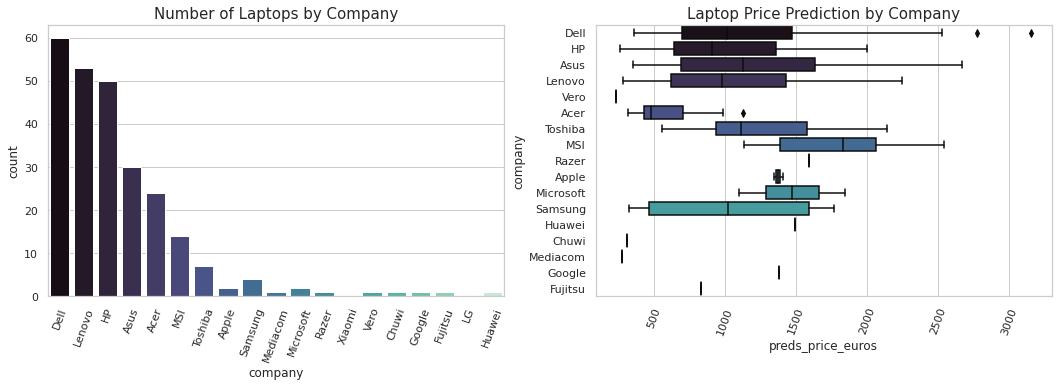

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='company', ax=axes[0], data=df_out, order=df['company'].value_counts().index, palette='mako')
sns.boxplot(x='preds_price_euros', y='company', data=df_out, palette='mako')

axes[0].set_title('Number of Laptops by Company', fontsize=15)
axes[1].set_title('Laptop Price Prediction by Company', fontsize=15)

plt.show()

**Number & Prediction Price of Laptops by Type**

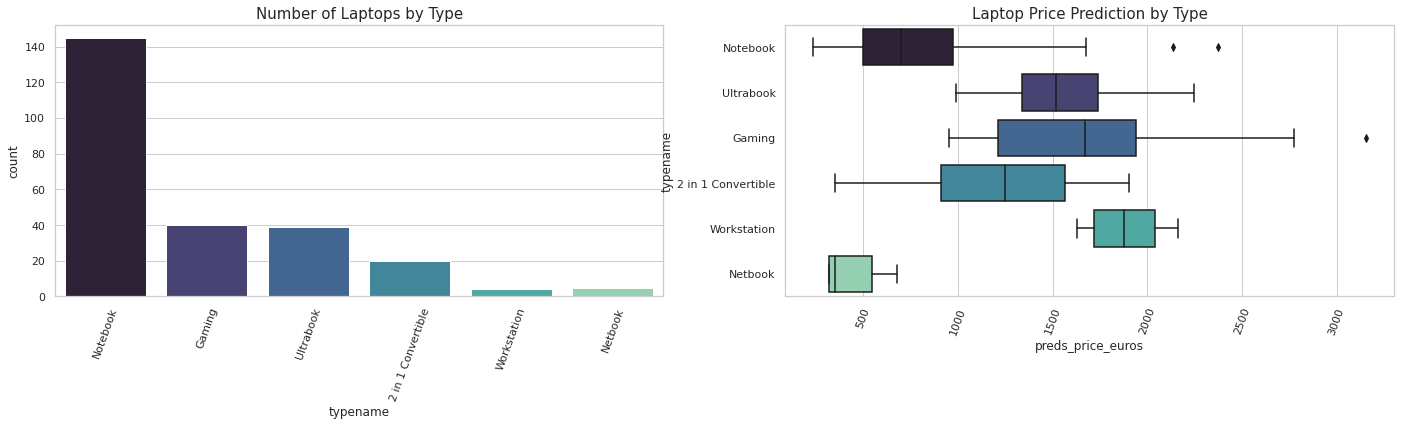

In [ ]:
sns.set(rc={'figure.figsize':(24,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='typename', ax=axes[0], data=df_out, order=df['typename'].value_counts().index, palette='mako')
sns.boxplot(x='preds_price_euros', y='typename', data=df_out, palette='mako')

axes[0].set_title('Number of Laptops by Type', fontsize=15)
axes[1].set_title('Laptop Price Prediction by Type', fontsize=15)

plt.show()

**Prediction Price Distribution & Average Price Prediction for each Company**

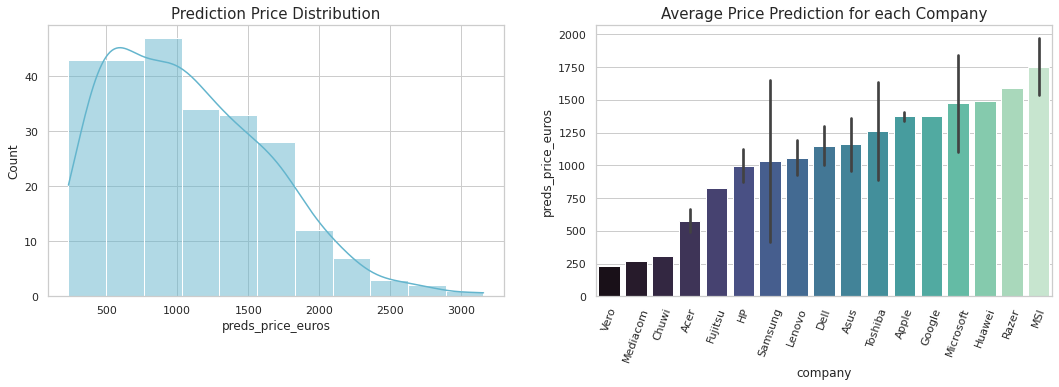

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.histplot(x='preds_price_euros', ax=axes[0], data=df_out, color='c', kde=True)

orders = df_out.groupby('company').preds_price_euros.agg('mean').sort_values().index
sns.barplot(x='company', y='preds_price_euros', estimator=np.mean, ax=axes[1], data=df_out, palette='mako', order=orders)

plt.xticks(rotation=70)
axes[0].set_title('Prediction Price Distribution', fontsize=15)
axes[1].set_title('Average Price Prediction for each Company', fontsize=15)

plt.show()

**INSIGHT:** 
* Top 3 brand laptop populer (>30 jenis): Dell, Lenovo, & HP
* Terdapat 13 brand laptop dengan jumlah laptop kurang dari 10 jenis
* Harga prediksi laptop antara 500 hingga 3000, akan tetapi mayoritas harga di bawah 2000
* Brand laptop populer memiliki harga prediksi relatif sama dengan rata-rata sekitar 1000 euro
* Rata-rata harga prediksi laptop terendah pada brand Vero yaitu kurang dari 250 euro, sedangkan rata-rata harga prediksi MSI tertinggi yaitu melebihi 1700 euro 
* Top 3 tipe laptop populer: Notebook, Gaming, & Ultrabook. Namun, Notebook sangat mendominasi sedangkan Netbook tipe laptop paling tidak populer
* Notebook & netbook memiliki harga rata-rata terendah

#### CPU Brand & Operating System

In [ ]:
df_out['cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               35
Intel Core i7 7500U 2.7GHz               29
Intel Core i7 7700HQ 2.8GHz              28
Intel Core i3 6006U 2GHz                 14
Intel Core i5 6200U 2.3GHz               14
Intel Core i7 8550U 1.8GHz               14
Intel Core i5 8250U 1.6GHz               12
Intel Core i7 6700HQ 2.6GHz               9
Intel Core i7 6500U 2.5GHz                8
Intel Celeron Dual Core N3350 1.1GHz      7
Intel Celeron Dual Core N3060 1.6GHz      6
Intel Pentium Quad Core N4200 1.1GHz      6
Intel Core i5 7300HQ 2.5GHz               6
AMD A9-Series 9420 3GHz                   6
Intel Core i5 7300U 2.6GHz                6
Intel Core i3 6006U 2.0GHz                4
Intel Core i3 7100U 2.4GHz                4
Intel Core i3 7130U 2.7GHz                2
Intel Core i7 6820HQ 2.7GHz               2
Intel Core i7 7820HK 2.9GHz               2
Intel Core i3 6100U 2.3GHz                2
Intel Core i5 6300U 2.4GHz                2
Intel Core i7 6600U 2.6GHz      

**Number & Prediction Price of Laptops by CPU Brand**

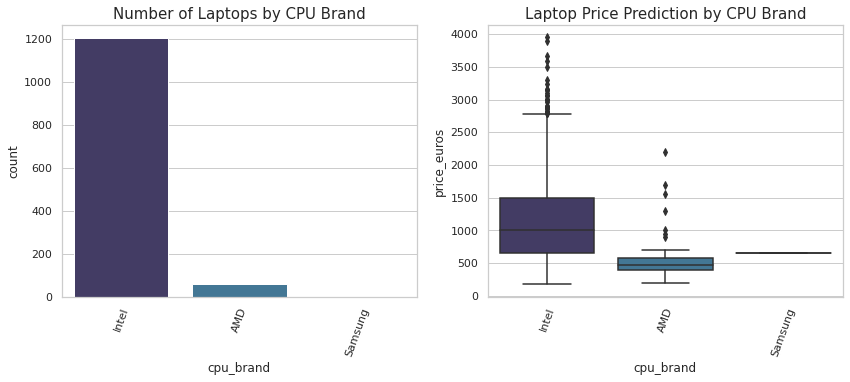

In [ ]:
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='cpu_brand', ax=axes[0], data=df, order=df['cpu_brand'].value_counts().index, palette='mako')
sns.boxplot(x='cpu_brand', y='price_euros', data=df, palette='mako')

axes[0].set_title('Number of Laptops by CPU Brand', fontsize=15)
axes[1].set_title('Laptop Price Prediction by CPU Brand', fontsize=15)

plt.show()

**Number & Prediction Price of Laptops by Operating System**

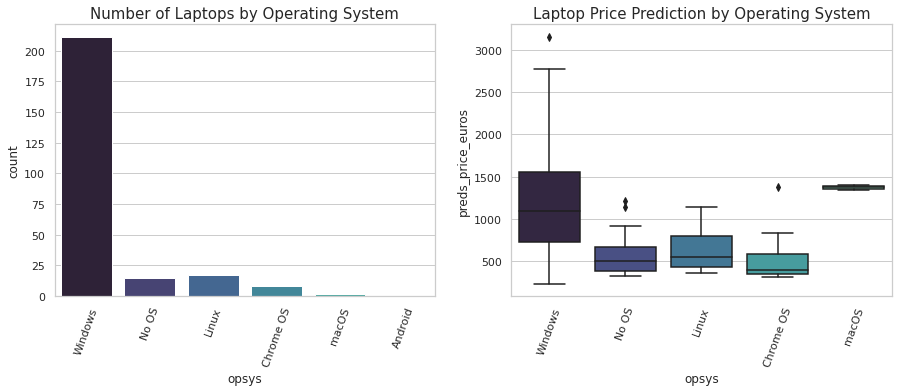

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='opsys', ax=axes[0], data=df_out, order=df['opsys'].value_counts().index, palette='mako')
sns.boxplot(x='opsys', y='preds_price_euros', data=df_out, palette='mako')

axes[0].set_title('Number of Laptops by Operating System', fontsize=15)
axes[1].set_title('Laptop Price Prediction by Operating System', fontsize=15)

plt.show()

**INSIGHT:** 
* Top brand CPU terpopuler & termahal (prediksi): Intel (sangat mendominasi dibandingkan 2 brand lainnya)
* Sistem operasi yang tersedia: Windows, Mac, Chrome, Linux, & Android, serta laptop yang dijual kosongan tanpa sistem operasi (No OS)
* Harga prediksi & jumlah laptop Windows sangat mendominasi dibandingkan sistem operasi lainnya
* Rata-rata harga prediksi laptop termahal: Laptop Windows
* Rata-rata harga laptop prediksi termurah: Laptop macOS



#### Weight & Screen Size

**Distribution of Weight & Screen Size**

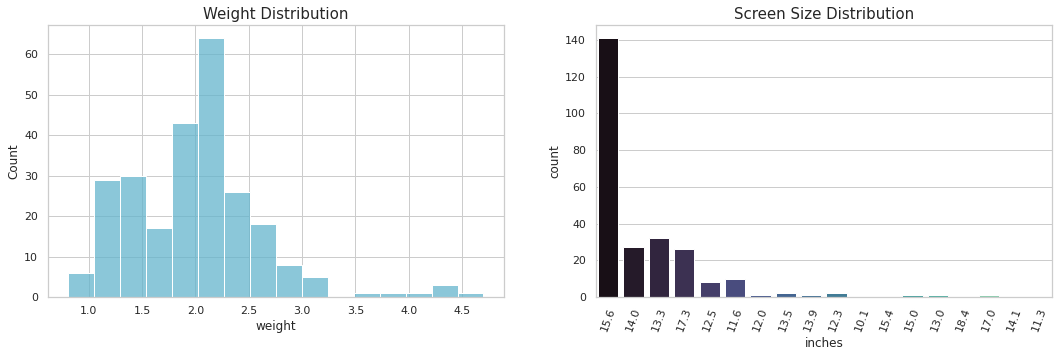

In [ ]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.histplot(x='weight', ax=axes[0], color='c', data=df_out)
sns.countplot(x='inches', ax=axes[1], order=df['inches'].value_counts().index, data=df_out, palette='mako')

plt.xticks(rotation=70)

axes[0].set_title('Weight Distribution', fontsize=15)
axes[1].set_title('Screen Size Distribution', fontsize=15)

plt.show()

**INSIGHT:** 
* Lebih dari setengah laptop pada dataset memiliki layar ukuran 15.6 inches.
* Top 5 ukuran layar laptop terbanyak: 15.6, 14.0, 13.3, 17.3, & 12.5
* Ukuran berat laptop didominasi dengan berat sekitar 2 gr

#### RAM & Hard Drive

**Number & Prediction Price of Laptops by RAM**

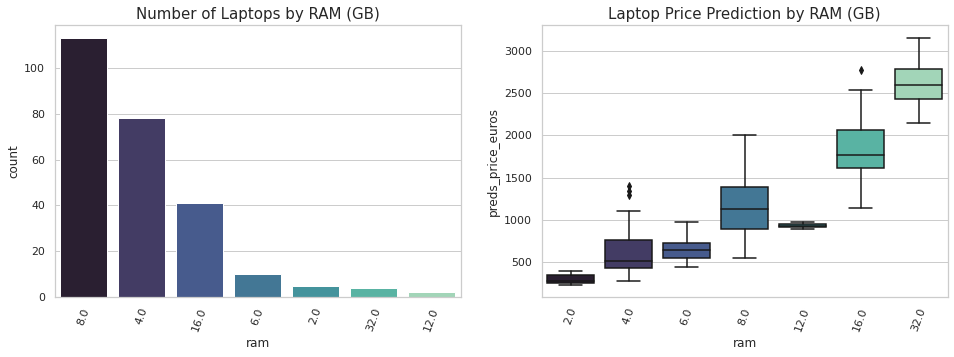

In [ ]:
sns.set(rc={'figure.figsize':(16,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='ram', ax=axes[0], data=df_out, order=df_out['ram'].value_counts().index, palette='mako')
sns.boxplot(x='ram', y='preds_price_euros', data=df_out, palette='mako')

axes[0].set_title('Number of Laptops by RAM (GB)', fontsize=15)
axes[1].set_title('Laptop Price Prediction by RAM (GB)', fontsize=15)

plt.show()

**Number of Laptops by Hard Drive Type**

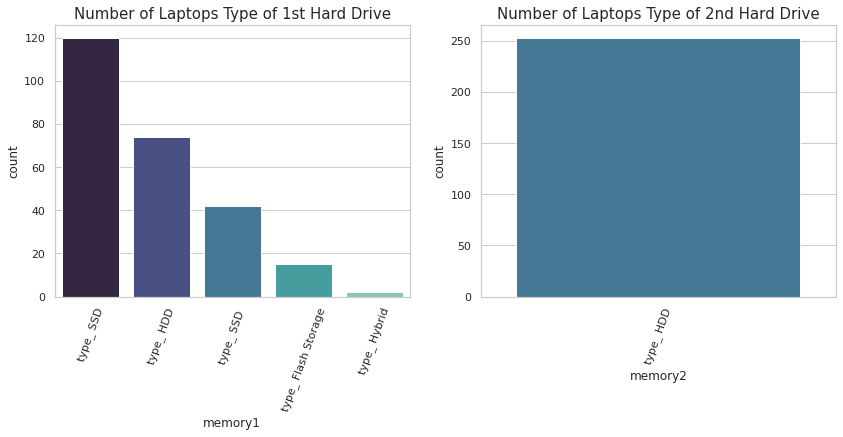

In [ ]:
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='memory1', ax=axes[0], data=df_out, order=df_out['memory1'].value_counts().index, palette='mako')
sns.countplot(x='memory2', ax=axes[1], data=df_out, order=df_out['memory2'].value_counts().index, palette='mako')

axes[0].set_title('Number of Laptops Type of 1st Hard Drive', fontsize=15)
axes[1].set_title('Number of Laptops Type of 2nd Hard Drive', fontsize=15)

plt.show()

**Number of Laptops by Hard Drive Capacity Type**

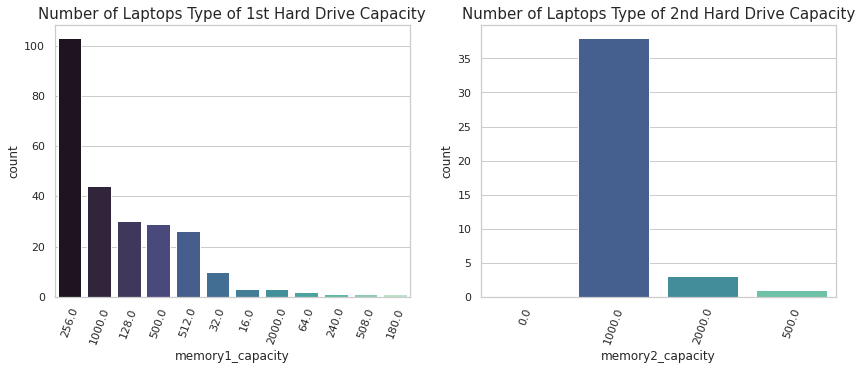

In [ ]:
sns.set(rc={'figure.figsize':(14,5)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=70)

sns.countplot(x='memory1_capacity', ax=axes[0], data=df_out, order=df_out['memory1_capacity'].value_counts().index, palette='mako')
sns.countplot(x='memory2_capacity', ax=axes[1], order=df_out['memory2_capacity'].value_counts().index, data=df_out[df_out['memory2_capacity']!=0], palette='mako')


axes[0].set_title('Number of Laptops Type of 1st Hard Drive Capacity', fontsize=15)
axes[1].set_title('Number of Laptops Type of 2nd Hard Drive Capacity', fontsize=15)

plt.show()

**Prediction Price of Laptops by Hard Drive Capacity Type**

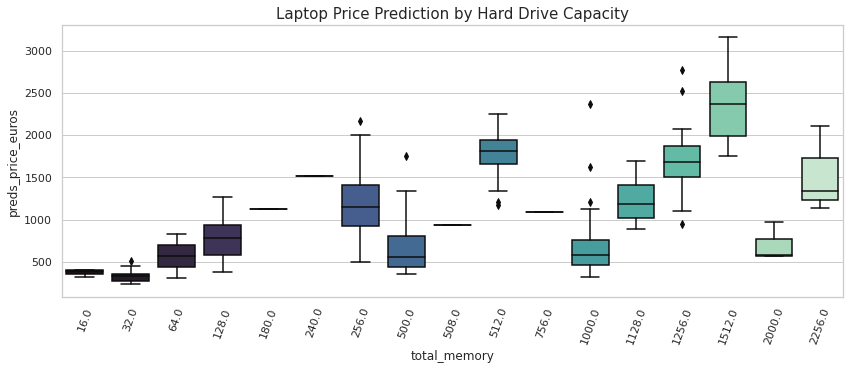

In [ ]:
df_out['total_memory'] = df_out['memory1_capacity'] + df_out['memory2_capacity']
sns.boxplot(x='total_memory', y='preds_price_euros', data=df_out, palette='mako')
plt.xticks(rotation=70)
plt.title('Laptop Price Prediction by Hard Drive Capacity', fontsize=15)
plt.show()

* Laptop didominasi dengan RAM sebesar 8 GB & harga prediksi menunjukkan kecederungan semakin besar RAM, maka semakin mahal harganya
* Jenis memory 1 paling umum: SSD 
* Jenis memory 2 hanya tipe HDD
* Memory 2 memiliki kapasitas lebih besar dari memory 1
* Kapasitas memory memiliki kecenderungan terhadap harga, namun tidak terlalu signifikan

### Correlation 

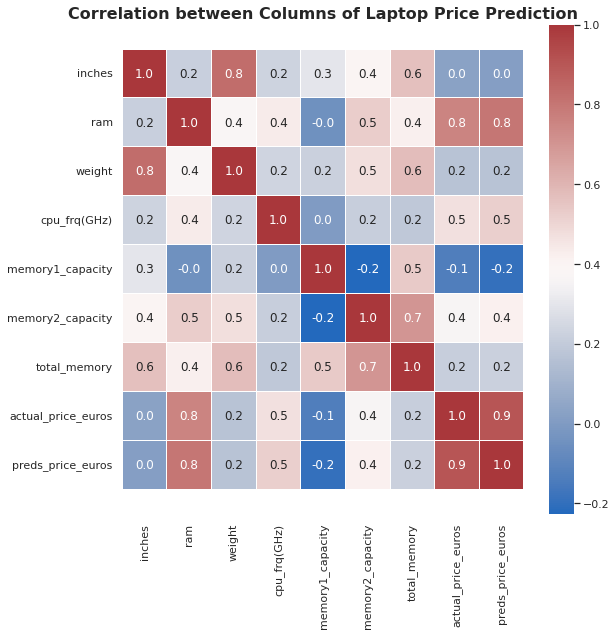

In [ ]:
corr = df_out.corr()
f,ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(corr, annot=True, linewidths=.05,fmt= '.1f', ax=ax, cmap='vlag')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation between Columns of Laptop Price Prediction', weight='bold', fontsize=16)
plt.show()

* Jika dilihat dari kolom 'preds_price_euros' (kolom paling kanan/ paling bawah) dapat diketahui bahwa harga prediksi laptop berhubungan sangat kuat dengan ukuram RAM (0.8), kemudian frekuensi CPU (0.5), serta berhubungan namun tidak terlalu kuat dengan kapasitas memori (0.4) & berat laptop (0.2)
* Berdasarkan fitur teratas hasil MDI dan MDA, serta korelasi dapat disimpulkan bahwa ukuran RAM sangat berpengaruh dengan harga laptop